In [ ]:
!pip install -q transformers datasets numba

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModelForSeq2SeqLM, TrainingArguments, Trainer, create_optimizer, AdamWeightDecay, DataCollatorForSeq2Seq
from transformers.keras_callbacks import PushToHubCallback
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyarrow as pa
import pyarrow.dataset as ds
import datasets
from datasets import Dataset
import os
from numba import cuda

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filename_dataset = "drive/Shareddrives/BPM PROJECT/Dataset/sample_weighted.csv"
df = pd.read_csv(filename_dataset)
df

,review_body,review_headline,star_rating,helpful_votes,review_date,review_weight
0,Does the job.,Five Stars,5,0,2015-08-31,0.000000
1,Cool,Five Stars,5,0,2015-08-31,0.000000
2,They work fine.,Five Stars,5,0,2015-08-31,0.000000
3,I love it,Five Stars,5,0,2015-08-31,0.000000
4,"Buenas, excelente cable.",Five Stars,5,0,2015-08-31,0.000000
...,...,...,...,...,...,...
15328,This is the HDMI cable to get right now: an HD...,A Basic Cable at a Good Price,5,297,2010-11-01,28.485467
15329,I connected my Blu Ray disc player to my HDTV ...,Easy and lightweight HDMI cable does it all.,5,5,2010-11-01,8.958797
15330,"Just unpacked my cable,it is really very high ...",High quality,5,1,2010-11-01,3.465736
15331,I have purchased quite a few AmazonBasics item...,It works.,5,12,2010-11-01,12.824747


In [ ]:
date = df['review_date']
date_list = []
for d in date:
  elem = d.split('-')
  date_list.append(elem[0])
date_list = [eval(i) for i in date_list]

(array([  48.,    0.,  508.,    0.,  836.,    0.,    0., 3103.,    0.,
        5421.,    0., 5417.]),
 array([2010.        , 2010.41666667, 2010.83333333, 2011.25      ,
        2011.66666667, 2012.08333333, 2012.5       , 2012.91666667,
        2013.33333333, 2013.75      , 2014.16666667, 2014.58333333,
        2015.        ]),
 <BarContainer object of 12 artists>)

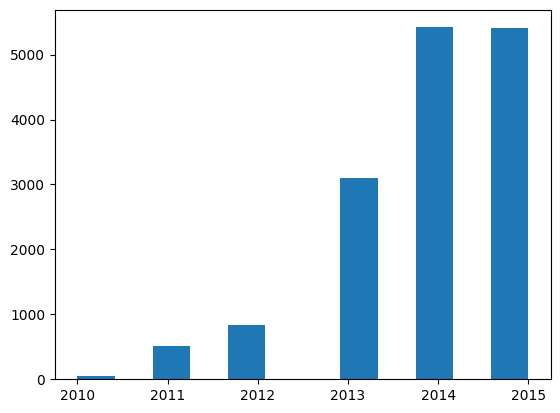

In [ ]:
plt.hist(date_list, bins=12)


In [ ]:
df['review_date'] = date_list
df

,review_body,review_headline,star_rating,helpful_votes,review_date,review_weight
0,Does the job.,Five Stars,5,0,2015,0.000000
1,Cool,Five Stars,5,0,2015,0.000000
2,They work fine.,Five Stars,5,0,2015,0.000000
3,I love it,Five Stars,5,0,2015,0.000000
4,"Buenas, excelente cable.",Five Stars,5,0,2015,0.000000
...,...,...,...,...,...,...
15328,This is the HDMI cable to get right now: an HD...,A Basic Cable at a Good Price,5,297,2010,28.485467
15329,I connected my Blu Ray disc player to my HDTV ...,Easy and lightweight HDMI cable does it all.,5,5,2010,8.958797
15330,"Just unpacked my cable,it is really very high ...",High quality,5,1,2010,3.465736
15331,I have purchased quite a few AmazonBasics item...,It works.,5,12,2010,12.824747


In [ ]:
df_2010 = df[df['review_date'] == 2010]
df_2011 = df[df['review_date'] == 2011]
df_2012 = df[df['review_date'] == 2012]
df_2013 = df[df['review_date'] == 2013]
df_2014 = df[df['review_date'] == 2014]
df_2015 = df[df['review_date'] == 2015]

In [ ]:
df_2010

,review_body,review_headline,star_rating,helpful_votes,review_date,review_weight
15285,"Quality is great, fit and finish is just as go...",What more can you ask for in a hdmi cable?,5,0,2010,0.000000
15286,This cable sure made it easy to hook up and be...,Easy hook up.,5,0,2010,0.000000
15287,i just came out of best buy looking for an hdm...,great product,5,1,2010,3.465736
15288,"I am using this product for my xbox 360, while...",It's Ok,3,4,2010,4.828314
15289,"Thanks, Amazon. You saved me tons of money bu...",Just buy these,5,0,2010,0.000000
15290,the only problem I had was in delivery. I paid...,hdmi cable,4,3,2010,5.545177
15291,The missing link in setting up my new blu-ray ...,Why pay more?,5,1,2010,3.465736
15292,The cables worked as I expected. There is no ...,Why pay more?,4,1,2010,2.772589
15293,"That is just it - great price, worth the wait....",Great price - worth the wait,5,1,2010,3.465736
15294,There is no need to pay premium prices for HDM...,"quality HDMI, awesome price",5,1,2010,3.465736


In [ ]:
tokenizer = AutoTokenizer.from_pretrained('facebook/bart-large-xsum')
model = TFAutoModelForSeq2SeqLM.from_pretrained('facebook/bart-large-xsum')

All model checkpoint layers were used when initializing TFPegasusForConditionalGeneration.

Some layers of TFPegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['final_logits_bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def get_batches(reviews, sample):

  input = "summarize:"
  count = 0
  checkpoint = 0


  #batch creation
  #creo un array di testi concatenati, ognuno dei quali ha massimo 1024 token
  #lo stesso procedimento verrà fatto con i riassunti generati!
  # si parte da checkpoint in poi, fino a finire il ciclo.

  batches = []
  i = 0

  if sample:
    num_samples = 100
  else:
    num_samples = len(reviews)

  for i in range(0,num_samples):
  # for i in range(0,43):
    if count + len(reviews[i].split(" ")) < 1024:
      #print(cleaned_reviews[i])
      input = input + reviews[i] + " . "
      #print(input)
      count = count + len(reviews[i].split(" "))
    else:
      batches.append(input)
      print('Input {} created with a length of {} tokens.'.format(len(batches), count))
      print("Number of reviews processed: {}".format(i))
      input = "summarize: " + reviews[i] + " . "
      count = len(reviews[i].split(" "))

  if(count != 0):
    batches.append(input)
    print('Input {} created with a length of {} tokens.'.format(len(batches), count))
    print("Number of reviews processed: {}".format(i))

  return batches

In [ ]:
reviews = df_2010['review_body'].tolist()

In [ ]:
batches = get_batches(reviews, False)

Input 1 created with a length of 976 tokens.
Number of reviews processed: 101
Input 2 created with a length of 1010 tokens.
Number of reviews processed: 176
Input 3 created with a length of 1008 tokens.
Number of reviews processed: 249
Input 4 created with a length of 1017 tokens.
Number of reviews processed: 342
Input 5 created with a length of 1011 tokens.
Number of reviews processed: 438
Input 6 created with a length of 933 tokens.
Number of reviews processed: 508
Input 7 created with a length of 973 tokens.
Number of reviews processed: 564
Input 8 created with a length of 1020 tokens.
Number of reviews processed: 646
Input 9 created with a length of 1023 tokens.
Number of reviews processed: 734
Input 10 created with a length of 1012 tokens.
Number of reviews processed: 804
Input 11 created with a length of 1012 tokens.
Number of reviews processed: 894
Input 12 created with a length of 1018 tokens.
Number of reviews processed: 959
Input 13 created with a length of 979 tokens.
Number

In [ ]:
summaries_first_stage = []
for input in batches:
  inputs  = tokenizer.encode(input, return_tensors='tf', truncation=True, max_length=1024)
  output = model.generate(inputs, max_length=100)
  decoded_output = tokenizer.batch_decode(output, skip_special_tokens=True)[0]
  # print(decoded_output)
  summaries_first_stage.append(nltk.sent_tokenize(decoded_output.strip())[0])

In [ ]:
summaries_first_stage

['This is the cheapest HDMI cable I have ever bought.',
 'This HDMI cable is a great value for money.',
 'This is the best cable I have ever bought.',
 'This HDMI cable allows you to connect your smart phones, tablets, computers and other devices to your TV via the built-in HDMI port.',
 'These are the best HDMI cables I have ever bought.',
 'Great value for money.',
 'This is the best HDMI cable I have ever bought.',
 'Great value for money.',
 'This HDMI cable connects your laptop to your TV and allows you to stream content from your computer to the big screen.',
 "This is the best HDMI cable I've ever used.",
 'What are your thoughts on the Toshiba N3 HDMI Cable?',
 "I've been using this cable for about a year and it works great.",
 'These HDMI cables are great value for money.',
 "These are the best HDMI cables I've ever bought.",
 'This is the best HDMI cable I have ever bought.',
 'This is the best HDMI cable I have ever used.',
 'These HDMI cables are a great value for money.',


In [ ]:
input = "summarize: "
count = 0
checkpoint = 0
batches_second_stage = []
i = 0
for i in range(0,len(summaries_first_stage)):
  if count + len(summaries_first_stage[i].split(" ")) < 1024:
    #print(cleaned_reviews[i])
    input = input + summaries_first_stage[i] + " . "
    #print(input)
    count = count + len(summaries_first_stage[i].split(" "))
  else:
    batches_second_stage.append(input)
    print('Input {} created with a length of {} tokens.'.format(len(batches_second_stage), count))
    print("Number of reviews processed: {}".format(i))
    input = "summarize: " + summaries_first_stage[i] + " . "
    count = len(summaries_first_stage[i].split(" "))

if(count != 0):
  batches_second_stage.append(input)
  print('Input {} created with a length of {} tokens.'.format(len(batches_second_stage), count))
  print("Number of reviews processed: {}".format(i))

print(batches_second_stage)

Input 1 created with a length of 1021 tokens.
Number of reviews processed: 80
Input 2 created with a length of 464 tokens.
Number of reviews processed: 118
["summarize: This is the cheapest HDMI cable I have ever bought. . This HDMI cable is a great value for money. . This is the best cable I have ever bought. . This HDMI cable allows you to connect your smart phones, tablets, computers and other devices to your TV via the built-in HDMI port. . These are the best HDMI cables I have ever bought. . Great value for money. . This is the best HDMI cable I have ever bought. . Great value for money. . This HDMI cable connects your laptop to your TV and allows you to stream content from your computer to the big screen. . This is the best HDMI cable I've ever used. . What are your thoughts on the Toshiba N3 HDMI Cable? . I've been using this cable for about a year and it works great. . These HDMI cables are great value for money. . These are the best HDMI cables I've ever bought. . This is the 

In [ ]:
summaries_second_stage = []
for input in batches_second_stage:
  inputs  = tokenizer.encode(input, return_tensors='tf', truncation=True, max_length=1024)
  output = model.generate(inputs, max_length=100)
  decoded_output = tokenizer.batch_decode(output, skip_special_tokens=True)[0]
  summaries_second_stage.append(nltk.sent_tokenize(decoded_output.strip())[0])

In [ ]:
summaries_second_stage

["These are the best HDMI cables I've ever bought.",
 "I've been using this cable for a few weeks and it's working great, I've been using it for a few weeks and it's working great, I've been using it for a few weeks and it's working great, I've been using it for a few weeks and it's working great, I've been using it for a few weeks and it's working great, I've been using it for a few weeks and it"]

DF_2010 second stage ->

DF_2011 second stage ->


DF_2012 second stage ->

DF_2013 second stage ->


DF_2014 second stage ->

DF_2015 second stage ->
